In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin_tnc

In [46]:
data = pd.read_csv('ex2data1.txt', sep = ',')
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [47]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

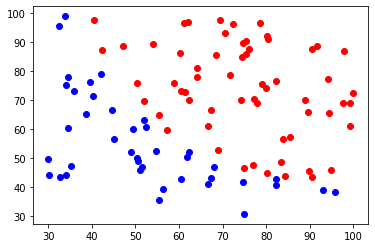

In [49]:
i = 0
while(i < len(data)):
    if data['y'][i] == 1:
        plt.plot(data['x1'][i], data['x2'][i], 'ro')
    else:
        plt.plot(data['x1'][i], data['x2'][i], 'bo')
    i = i + 1

In [50]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

In [68]:
X[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [51]:
y[:5]

array([[0],
       [0],
       [0],
       [1],
       [1]], dtype=int64)

In [52]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    return np.dot(x, theta)

def probability(theta, x):
    return sigmoid(net_input(theta, x))

In [56]:
def cost_function(theta, x, y):
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

In [57]:
def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]

In [58]:
parameters = fit(X, y, theta)

In [59]:
parameters

array([-25.16131863,   0.20623159,   0.20147149])

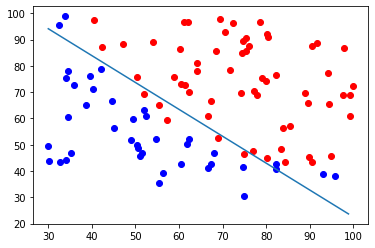

In [65]:
x_values = [np.min(X[:, 1]), np.max(X[:, 2])]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

i = 0
while(i < len(data)):
    if data['y'][i] == 1:
        plt.plot(data['x1'][i], data['x2'][i], 'ro')
    else:
        plt.plot(data['x1'][i], data['x2'][i], 'bo')
    i = i + 1
plt.plot(x_values, y_values)

In [66]:
def predict(x):
    theta = parameters[:, np.newaxis]
    return probability(theta, x)
def accuracy(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100
accuracy(X, y.flatten())

89.0